### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
sc = StandardScaler()


In [71]:
ls


R4_Internal_Lab-Clustering-1.ipynb  vehicle.csv


In [72]:
df_car = pd.read_csv('vehicle.csv')
df_car.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [73]:
df_car.shape

(846, 19)

In [74]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [75]:
df_car.dropna(inplace=True)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [76]:
df_car.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [77]:
df_car['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [78]:
df_car.shape

(813, 19)

In [79]:
df_car.drop(columns=['class'],inplace=True)
feature_names = df_car.columns
df_car = pd.DataFrame(sc.fit_transform(df_car))
df_car.columns = feature_names

In [80]:
df_car.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [81]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [82]:
# Let us check optimal number of clusters-

  

cluster_range = range( 1, 11)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_car)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.480402
4,5,5188.560696
5,6,4707.860902
6,7,4356.901587
7,8,4085.218472
8,9,3890.616401
9,10,3652.777474


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

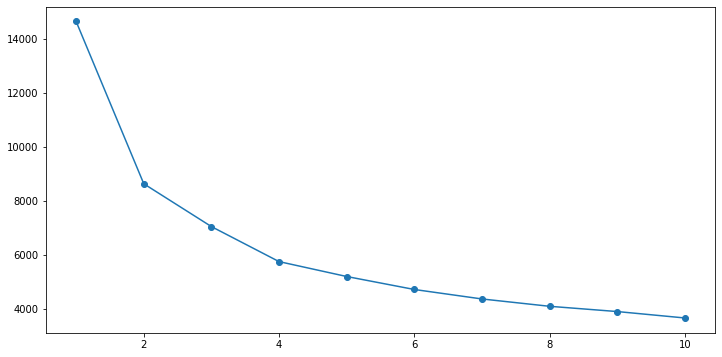

In [85]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

From the elbow graph, optimal value of K is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [91]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(df_car)

# Getting the cluster labels

labels = kmeans.predict(df_car)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")
print("sklearn")

print(centroids) # From sci-kit learn


Centroid values
sklearn
[[-2.09264676e-01 -5.49128724e-01 -2.88743241e-01 -1.08797437e-02
   1.95446941e-01 -1.69265755e-01 -4.33394530e-01  2.91291068e-01
  -4.64148552e-01 -5.16331040e-01 -3.98129335e-01 -4.40194916e-01
  -5.73738629e-01 -6.45992342e-01 -4.17212320e-02 -8.06389376e-03
   8.38667629e-01  7.17204733e-01]
 [ 1.16823216e+00  1.19288625e+00  1.22673969e+00  9.77005682e-01
   9.14974658e-02  2.25013018e-01  1.31320039e+00 -1.22387493e+00
   1.31824009e+00  1.10877702e+00  1.21886607e+00  1.32515470e+00
   1.09846443e+00 -1.00774832e-01  1.62451676e-01  2.84996197e-01
  -8.21450784e-03  1.87400482e-01]
 [-9.11731927e-01 -5.39051608e-01 -8.87466907e-01 -1.08311714e+00
  -5.59970681e-01 -3.02082674e-01 -7.86968755e-01  8.75041232e-01
  -7.53022960e-01 -5.00672615e-01 -8.06946196e-01 -7.89002431e-01
  -4.16166196e-01  7.47926018e-01 -1.05409303e-01 -2.74365382e-01
  -1.01519087e+00 -1.07226654e+00]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [93]:
df_centroids = pd.DataFrame(centroids,columns=df_car.columns)
df_centroids.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.209265,-0.549129,-0.288743,-0.010880,0.195447,-0.169266,-0.433395,0.291291,-0.464149,-0.516331,-0.398129,-0.440195,-0.573739,-0.645992,-0.041721,-0.008064,0.838668,0.717205
1,1.168232,1.192886,1.226740,0.977006,0.091497,0.225013,1.313200,-1.223875,1.318240,1.108777,1.218866,1.325155,1.098464,-0.100775,0.162452,0.284996,-0.008215,0.187400
2,-0.911732,-0.539052,-0.887467,-1.083117,-0.559971,-0.302083,-0.786969,0.875041,-0.753023,-0.500673,-0.806946,-0.789002,-0.416166,0.747926,-0.105409,-0.274365,-1.015191,-1.072267
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

## Use kmeans.labels_ function to print out the labels of the classes

In [94]:
kmeans.labels_

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [95]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [112]:
df_c = pd.DataFrame(c,columns=['v1','v2'])
df_b = pd.DataFrame(b,columns=['v1','v2'])
df_abc = pd.DataFrame(a,columns=['v1','v2'])
df_abc = pd.DataFrame.append(df_abc,df_b)
df_abc = pd.DataFrame.append(df_abc,df_c)
df_abc

,v1,v2
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
...,...,...
95,9.248848,24.346291
96,6.958291,16.448655
97,11.260042,20.333577
98,6.889835,21.238297


In [113]:
df_abc.head()

,v1,v2
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

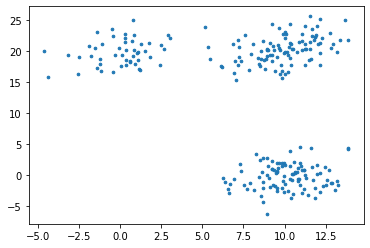

In [117]:
plt.scatter(df_abc['v1'],df_abc['v2'], s=7)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [126]:
Z = linkage(df_abc,metric='euclidean', method='ward')
Z

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

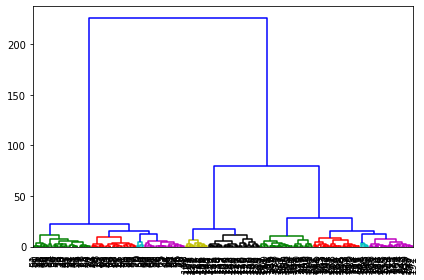

In [131]:
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()


### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

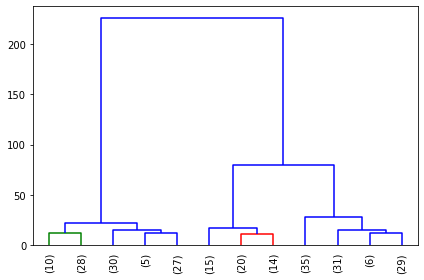

In [132]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [133]:
#From the truncated dendrogram, the optimal distance is 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [142]:
f = fcluster(Z,t=50,criterion='distance')
f

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

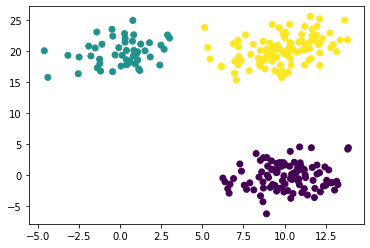

In [144]:
plt.scatter(df_abc['v1'],df_abc['v2'],c=f)